Please upload the Excel file containing TB3M and TB6M data:


Saving Pregunta 19 Examen final .xlsx to Pregunta 19 Examen final .xlsx

Columns in the file: ['obs', 'GS3M', 'GS6M']
Enter the column name for TB3M (3-month Treasury bill rate): GS3M
Enter the column name for TB6M (6-month Treasury bill rate): GS6M


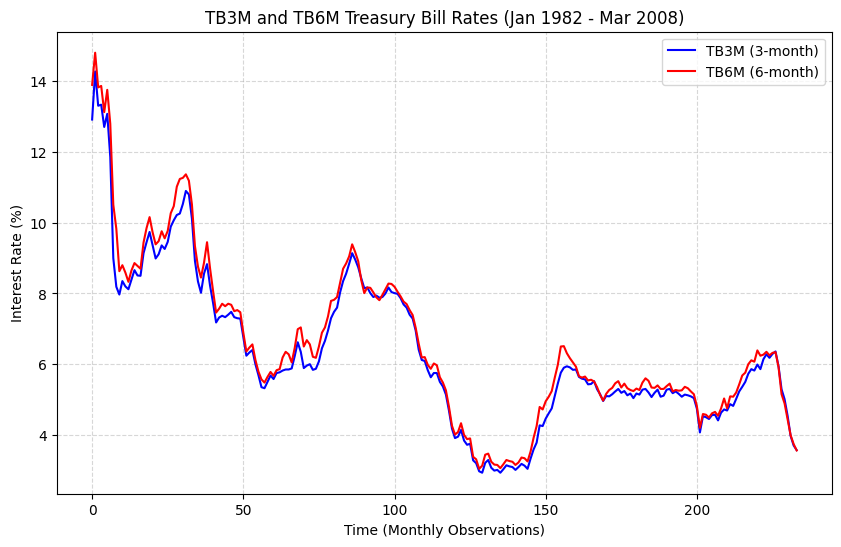


Observation (a): Visually inspect the plot. Typically, TB3M and TB6M move closely together, suggesting a potential long-term relationship, though trends or non-stationarity may be present.

Testing TB3M for stationarity (ADF Test):
ADF Statistic: -1.5392
p-value: 0.5140
Critical 1%: -3.4600
Critical 5%: -2.8746
Not Stationary

Testing TB6M for stationarity (ADF Test):
ADF Statistic: -3.7738
p-value: 0.0032
Critical 1%: -3.4589
Critical 5%: -2.8741
Stationary

Testing First Difference of TB3M for stationarity (ADF Test):
ADF Statistic: -5.5734
p-value: 0.0000
Critical 1%: -3.4600
Critical 5%: -2.8746
Stationary

Testing cointegration between TB3M and TB6M:
Cointegration Statistic: -4.7367, p-value: 0.0005
Critical values: [-3.94406143 -3.36247928 -3.06270268]
Cointegrated at 95% confidence

(d) Economic Meaning of Cointegration:
If TB3M and TB6M are cointegrated, it implies a stable long-run equilibrium relationship between the 3-month and 6-month Treasury bill rates. Economically, thi

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [1]:
# Ensure statsmodels is up-to-date
!pip install --upgrade statsmodels

# Load essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.api import VAR

# Function to load data from an uploaded Excel file
def load_data():
    print("Please upload the Excel file containing TB3M and TB6M data:")
    uploaded = files.upload()
    file_key = next(iter(uploaded))  # Get the name of the uploaded file dynamically
    df = pd.read_excel(file_key)
    print("\nColumns in the file:", df.columns.tolist())
    tb3m_col = input("Enter the column name for TB3M (3-month Treasury bill rate): ")
    tb6m_col = input("Enter the column name for TB6M (6-month Treasury bill rate): ")
    return df[[tb3m_col, tb6m_col]].dropna().rename(columns={tb3m_col: 'TB3M', tb6m_col: 'TB6M'})

# Stationarity test (ADF)
def check_stationarity(series, label):
    print(f"\nTesting {label} for stationarity (ADF Test):")
    result = adfuller(series)
    stats = {'ADF Statistic': result[0], 'p-value': result[1],
             'Critical 1%': result[4]['1%'], 'Critical 5%': result[4]['5%']}
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")
    is_stationary = result[1] < 0.05
    print("Stationary" if is_stationary else "Not Stationary")
    return is_stationary

# Cointegration test
def test_cointegration(series1, series2, name1, name2):
    print(f"\nTesting cointegration between {name1} and {name2}:")
    stat, pval, crit = coint(series1, series2)
    print(f"Cointegration Statistic: {stat:.4f}, p-value: {pval:.4f}")
    print(f"Critical values: {crit}")
    is_cointegrated = pval < 0.05
    print("Cointegrated at 95% confidence" if is_cointegrated else "Not Cointegrated")
    return is_cointegrated

# Main execution
# Load the data
data = load_data()
tb3m = data['TB3M']
tb6m = data['TB6M']

# Part (a): Plot the two time series
plt.figure(figsize=(10, 6))
plt.plot(tb3m, label='TB3M (3-month)', color='blue')
plt.plot(tb6m, label='TB6M (6-month)', color='red')
plt.title("TB3M and TB6M Treasury Bill Rates (Jan 1982 - Mar 2008)")
plt.xlabel("Time (Monthly Observations)")
plt.ylabel("Interest Rate (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print("\nObservation (a): Visually inspect the plot. Typically, TB3M and TB6M move closely together, "
      "suggesting a potential long-term relationship, though trends or non-stationarity may be present.")

# Part (b): Unit root analysis
tb3m_stationary = check_stationarity(tb3m, "TB3M")
tb6m_stationary = check_stationarity(tb6m, "TB6M")

# If not stationary, test first differences
if not tb3m_stationary:
    tb3m_diff = tb3m.diff().dropna()
    check_stationarity(tb3m_diff, "First Difference of TB3M")
if not tb6m_stationary:
    tb6m_diff = tb6m.diff().dropna()
    check_stationarity(tb6m_diff, "First Difference of TB6M")

# Part (c): Cointegration test
is_cointegrated = test_cointegration(tb3m, tb6m, "TB3M", "TB6M")

# Part (d): Economic interpretation
print("\n(d) Economic Meaning of Cointegration:")
if is_cointegrated:
    print("If TB3M and TB6M are cointegrated, it implies a stable long-run equilibrium relationship "
          "between the 3-month and 6-month Treasury bill rates. Economically, this suggests that "
          "despite short-term fluctuations, the spread between these rates tends to revert to a "
          "mean level, reflecting market expectations or term structure consistency.")
else:
    print("If TB3M and TB6M are not cointegrated, there is no stable long-run relationship. "
          "Economically, this could imply that the rates are driven by different factors or that "
          "the spread between them does not revert to a mean, potentially indicating market "
          "inefficiencies or independent monetary policy effects over these maturities.")

# Part (e): VAR model consideration
print("\n(e) VAR Model with 4 Lags:")
if tb3m_stationary and tb6m_stationary:
    print("Both series are stationary in levels. You can estimate the VAR model using the original "
          "levels (TB3M and TB6M) since stationarity is satisfied.")
    var_data = data
else:
    print("At least one series is non-stationary in levels. For a VAR model with 4 lags, you should "
          "use the first differences of the series (e.g., TB3M_diff and TB6M_diff) to ensure "
          "stationarity, unless cointegration exists and you opt for a VECM instead.")
    var_data = data.diff().dropna()  # Use differences if non-stationary

# Fit VAR model with 4 lags
var_model = VAR(var_data)
var_results = var_model.fit(maxlags=4)
print("\nVAR(4) Model Summary:")
print(var_results.summary())

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")